# Image Processing

**Basic Image Processing**
- translation
- rotation
- resizing
- flipping
- cropping

**Advanced Image Processing**
- Image Arithematic
- Bitwise Operation
- Masking

## Translation

Our translation matrix M is defined as a floating point
array – this is important because OpenCV expects this matrix to be of floating point type. The first row of the matrix
is [ 1, 0, t x ] , where t x is the number of pixels we will shift
the image left or right. Negative values of t x will shift the
image to the left and positive values will shift the image to
the right.

Then, we define the second row of the matrix as [ 0, 1, t y ] ,
where t y is the number of pixels we will shift the image up
or down. Negative value of t y will shift the image up and
positive values will shift the image down.

In [6]:
# import package
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

the original image


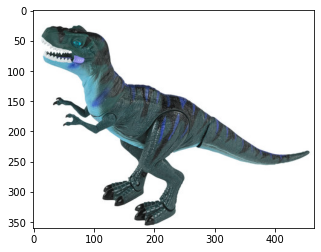

In [7]:
image = cv2.imread('./images/01-tyrex.jpg')
print("the original image")

plt.imshow(image)
plt.show()

Shifted Down and Right


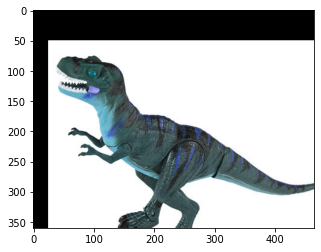

In [20]:
# translation matrix
# this matrix tells us how many pixels to the left or right, and up or down, the image will be shown 
M = np.float32([
    [1, 0, 25],
    [0, 1, 50]
])

shifted_down_right = cv2.warpAffine(image, M, (image.shape[1], image.shape[0])) # image, translation matrix, dimension of image
print('Shifted Down and Right')
plt.imshow(shifted_down_right)
plt.show()

Shifted Up and Left


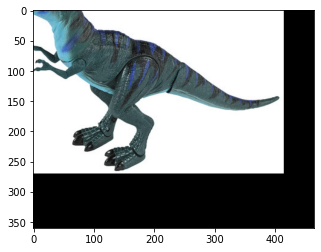

In [21]:
# translation matrix
# this matrix tells us how many pixels to the left or right, and up or down, the image will be shown 
M = np.float32([
    [1, 0, -50],
    [0, 1, -90]
])

shifted_up_left = cv2.warpAffine(image, M, (image.shape[1], image.shape[0])) # image, translation matrix, dimension of image
print('Shifted Up and Left')
plt.imshow(shifted_up_left)
plt.show()

Translation


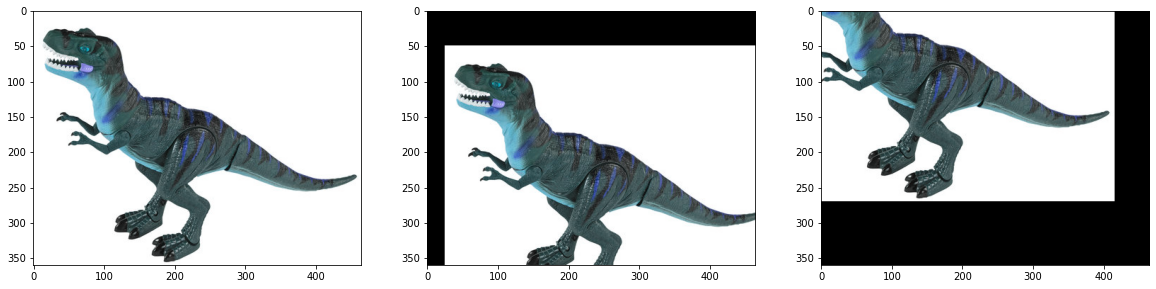

In [22]:
plt.figure(figsize=(20,20))
print('Translation')
plt.subplot(1,3,1)
plt.imshow(image)
plt.subplot(1,3,2)
plt.imshow(shifted_down_right)
plt.subplot(1,3,3)
plt.imshow(shifted_up_left)
plt.show()

## Rotation

rotation is rotating an image by some angle theta

the original image


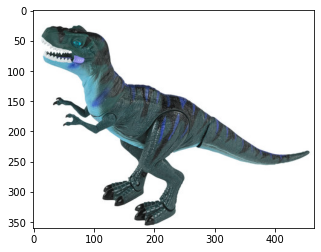

In [23]:
image = cv2.imread('./images/01-tyrex.jpg')
print("the original image")

plt.imshow(image)
plt.show()

In [24]:
# get center 
(h, w) = image.shape[0], image.shape[1]

In [25]:
center = (w//2, h//2) # getting center

In [27]:
M = cv2.getRotationMatrix2D(center, 45.0, 1.0) # generates rotation matrix from point center and 45 degree
print(M)

[[  0.70710678   0.70710678 -59.32799385]
 [ -0.70710678   0.70710678 216.76955262]]


rotated image


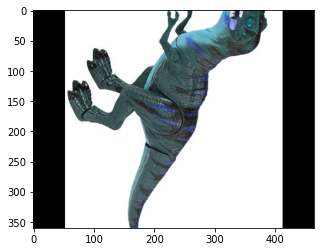

In [32]:
rotated_1 = cv2.warpAffine(image, M, (w, h))
print("rotated image")
plt.imshow(rotated_1)
plt.show()

[[ 6.123234e-17 -1.000000e+00  4.120000e+02]
 [ 1.000000e+00  6.123234e-17 -5.200000e+01]]
rotated image


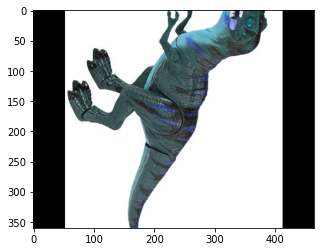

In [33]:
M = cv2.getRotationMatrix2D(center, -90.0, 1.0) # center, degree, scale # generates rotation matrix from point center and 90 degree negative
print(M)

rotated_2 = cv2.warpAffine(image, M, (w, h))
print("rotated image")
plt.imshow(rotated_2)
plt.show()

Rotation


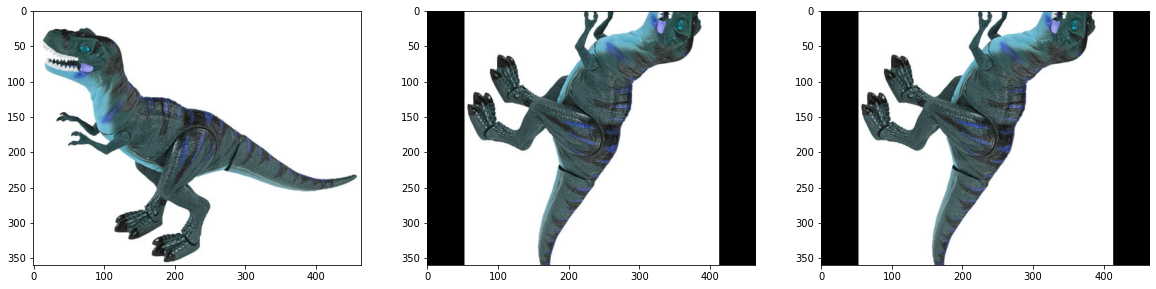

In [34]:
plt.figure(figsize=(20,20))
print('Rotation')
plt.subplot(1,3,1)
plt.imshow(image)
plt.subplot(1,3,2)
plt.imshow(rotated_1)
plt.subplot(1,3,3)
plt.imshow(rotated_2)
plt.show()

## Resizing

the original image


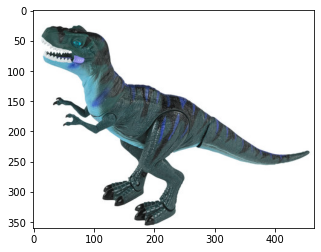

In [35]:
image = cv2.imread('./images/01-tyrex.jpg')
print("the original image")

plt.imshow(image)
plt.show()

resized from width


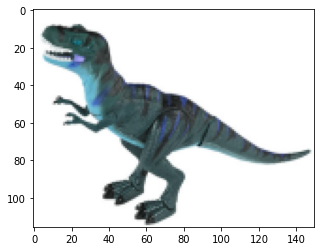

In [37]:
r = 150.0 / image.shape[1]  # ratio = new width / old width
dim = (150, int(image.shape[0] * r)) # height is multiplied by that ration to maintain aspect ratio

# other interpolations --> cv2.INTER_LINEAR,cv2.INTER_CUBIC, and cv2.INTER_NEAREST.
resized_width = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
print("resized from width")
plt.imshow(resized_width)
plt.show()

resized from height


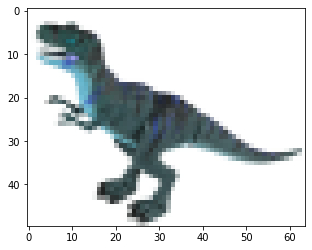

In [38]:
r = 50 / image.shape[0]
dim = (int(image.shape[1] * r), 50)

resized_height = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
print("resized from height")
plt.imshow(resized_height)
plt.show()

Resized


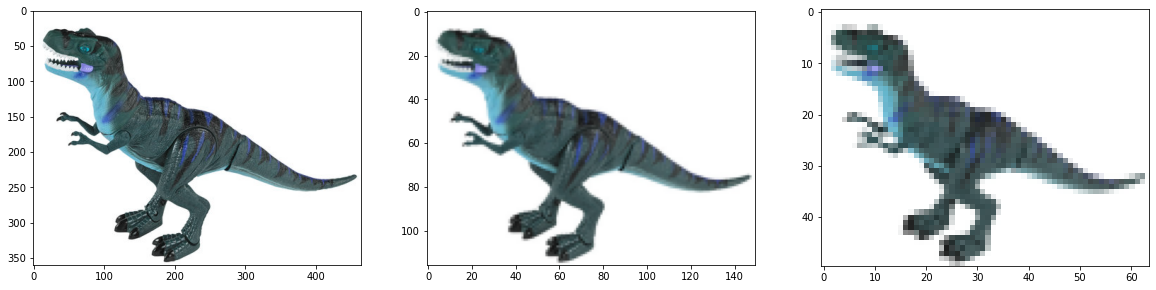

In [39]:
plt.figure(figsize=(20,20))
print('Resized')
plt.subplot(1,3,1)
plt.imshow(image)
plt.subplot(1,3,2)
plt.imshow(resized_width)
plt.subplot(1,3,3)
plt.imshow(resized_height)
plt.show()

## Flipping

the original image


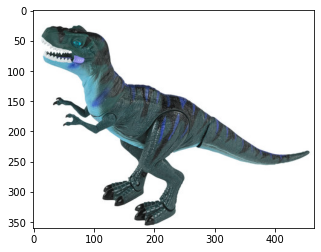

In [40]:
image = cv2.imread('./images/01-tyrex.jpg')
print("the original image")

plt.imshow(image)
plt.show()

Flipping horizontal


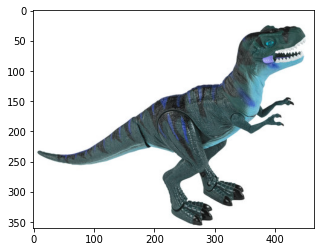

In [41]:
flipped_horizontal = cv2.flip(image, 1)
print("Flipping horizontal")

plt.imshow(flipped_horizontal)
plt.show()

Flipping vertical


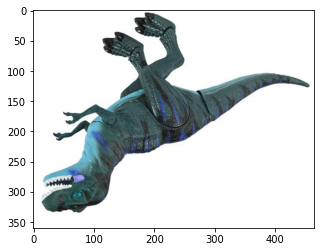

In [42]:
flipped_vertical = cv2.flip(image, 0)
print("Flipping vertical")

plt.imshow(flipped_vertical)
plt.show()

Flipping Horizontally and Vertically


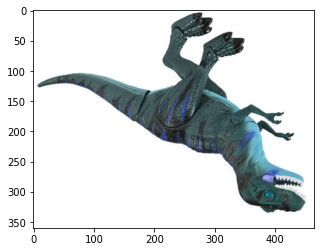

In [46]:
flipped_both = cv2.flip(image, -1)
print("Flipping Horizontally and Vertically")

plt.imshow(flipped_both)
plt.show()

Flipping


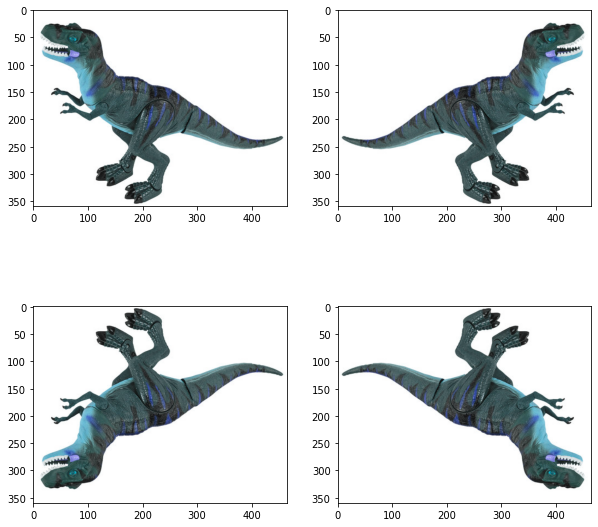

In [47]:
plt.figure(figsize=(10,10))
print('Flipping')
plt.subplot(2,2,1)
plt.imshow(image)
plt.subplot(2,2,2)
plt.imshow(flipped_horizontal)
plt.subplot(2,2,3)
plt.imshow(flipped_vertical)
plt.subplot(2,2,4)
plt.imshow(flipped_both)
plt.show()